In [2]:
# Importing required libraries
import pandas as pd
import sqlite3

In [3]:
# Loading orders data from CSV file
orders = pd.read_csv("orders.csv")

orders.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [4]:
# Loading users data from JSON file
users = pd.read_json("users.json")

users.head()

,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [5]:
# Creating SQLite connection
conn = sqlite3.connect("restaurants.db")
cursor = conn.cursor()

# Executing SQL script to create restaurant table
with open("restaurants.sql", "r") as file:
    sql_script = file.read()
cursor.executescript(sql_script)

# Reading restaurant table into DataFrame
restaurants = pd.read_sql("SELECT * FROM restaurants", conn)

restaurants.head()

,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [6]:
# Merging orders with users on user_id
orders_users = pd.merge(
    orders,
    users,
    on="user_id",
    how="left"
)

# Merging the result with restaurants on restaurant_id
final_df = pd.merge(
    orders_users,
    restaurants,
    on="restaurant_id",
    how="left"
)

# Preview final dataset
final_df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [7]:
# Exporting final dataset to CSV
final_df.to_csv("final_food_delivery_dataset.csv", index=False)

In [8]:
# Checking dataset shape
final_df.shape

(10000, 12)

In [9]:
# Checking missing values
final_df.isnull().sum()

,0
order_id,0
user_id,0
restaurant_id,0
order_date,0
total_amount,0
restaurant_name_x,0
name,0
city,0
membership,0
restaurant_name_y,0


In [10]:
# Checking data types
final_df.dtypes

,0
order_id,int64
user_id,int64
restaurant_id,int64
order_date,object
total_amount,float64
restaurant_name_x,object
name,object
city,object
membership,object
restaurant_name_y,object


In [11]:
# Analysis Using Final Dataset

import matplotlib.pyplot as plt

In [12]:
# Load final dataset
df = pd.read_csv("final_food_delivery_dataset.csv")

In [13]:
# Converting order_date to datetime format (DD-MM-YYYY)
df["order_date"] = pd.to_datetime(
    df["order_date"],
    format="%d-%m-%Y"
)

In [14]:
# Monthly order trend
monthly_orders = df.groupby(df["order_date"].dt.to_period("M"))["order_id"].count()
monthly_orders

,order_id
order_date,
2023-01,804
2023-02,785
2023-03,903
2023-04,812
2023-05,844
2023-06,784
2023-07,859
2023-08,851
2023-09,812


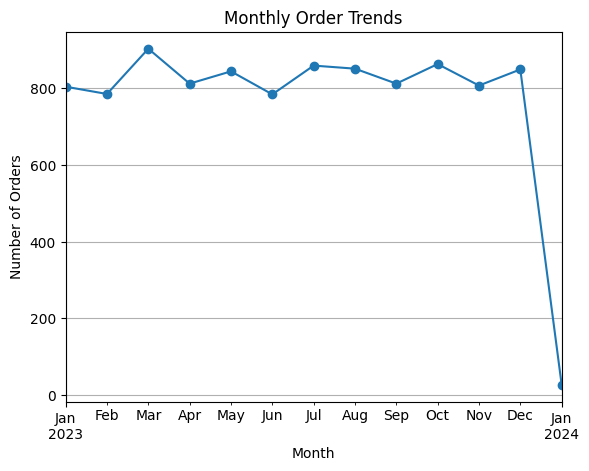

In [15]:
monthly_orders.plot(kind="line", marker="o")
plt.title("Monthly Order Trends")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.show()

In [16]:
# User Behavior Patterns
user_behavior = df.groupby("user_id").agg(
    total_orders=("order_id", "count"),
    total_spent=("total_amount", "sum")
)

user_behavior.head()

,total_orders,total_spent
user_id,,
1,1,1289.66
2,10,7564.12
3,2,1839.51
4,4,3741.16
5,5,5742.88


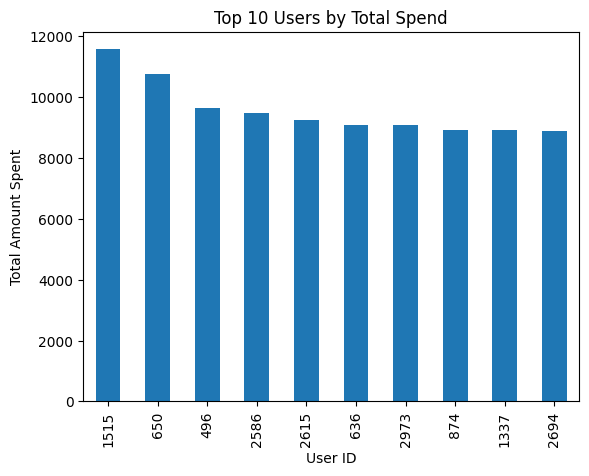

In [17]:
top_users = user_behavior.sort_values("total_spent", ascending=False).head(10)

top_users["total_spent"].plot(kind="bar")
plt.title("Top 10 Users by Total Spend")
plt.xlabel("User ID")
plt.ylabel("Total Amount Spent")
plt.show()

In [18]:
# City-Wise Performance

city_perf = df.groupby("city").agg(
    total_orders=("order_id", "count"),
    total_revenue=("total_amount", "sum")
)

city_perf

,total_orders,total_revenue
city,,
Bangalore,2751,2206946.58
Chennai,2469,1990513.03
Hyderabad,2350,1889366.58
Pune,2430,1924797.93


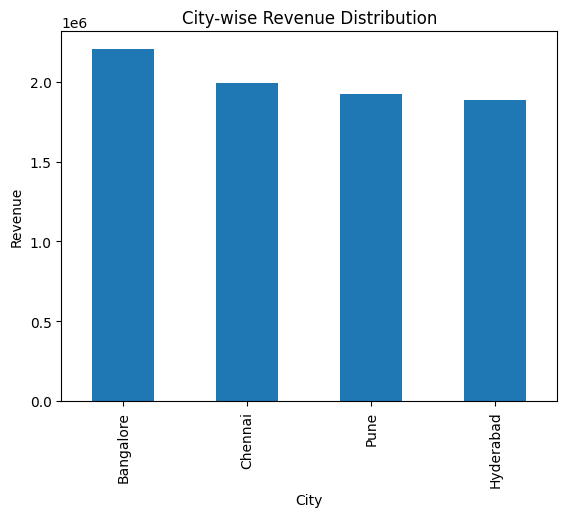

In [19]:
city_perf["total_revenue"].sort_values(ascending=False).plot(kind="bar")
plt.title("City-wise Revenue Distribution")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.show()

In [20]:
# Cuisine-Wise Performance

cuisine_perf = df.groupby("cuisine").agg(
    total_orders=("order_id", "count"),
    total_revenue=("total_amount", "sum")
)

cuisine_perf

,total_orders,total_revenue
cuisine,,
Chinese,2418,1930504.65
Indian,2469,1971412.58
Italian,2532,2024203.80
Mexican,2581,2085503.09


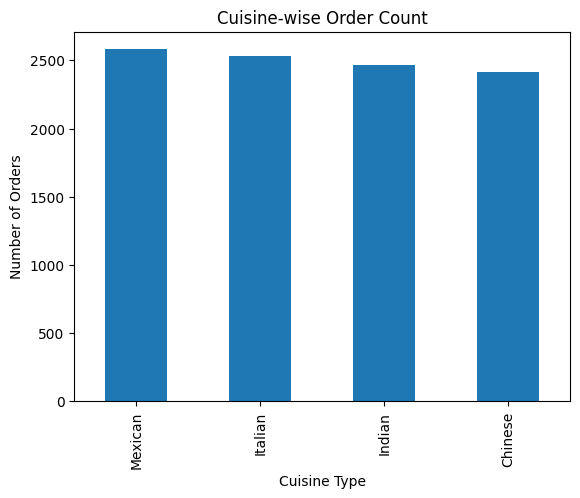

In [21]:
cuisine_perf["total_orders"].sort_values(ascending=False).plot(kind="bar")
plt.title("Cuisine-wise Order Count")
plt.xlabel("Cuisine Type")
plt.ylabel("Number of Orders")
plt.show()

In [22]:
# Membership Impact (Gold vs Regular)

membership_analysis = df.groupby("membership").agg(
    total_orders=("order_id", "count"),
    total_revenue=("total_amount", "sum"),
    avg_order_value=("total_amount", "mean")
)

membership_analysis

,total_orders,total_revenue,avg_order_value
membership,,,
Gold,4987,3975364.89,797.145556
Regular,5013,4036259.23,805.158434


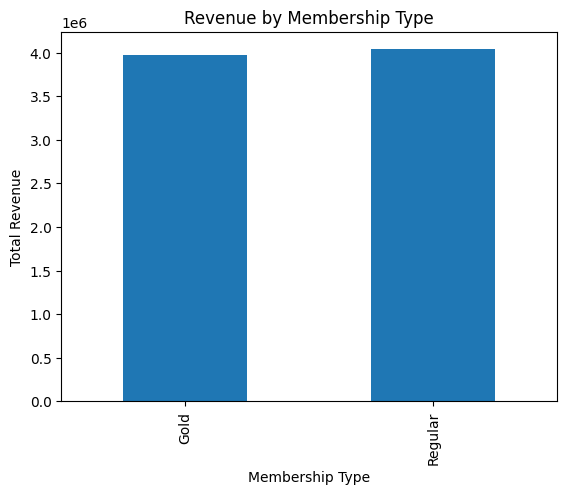

In [23]:
membership_analysis["total_revenue"].plot(kind="bar")
plt.title("Revenue by Membership Type")
plt.xlabel("Membership Type")
plt.ylabel("Total Revenue")
plt.show()

In [24]:
# Revenue Distribution & Seasonality

monthly_revenue = df.groupby(df["order_date"].dt.to_period("M"))["total_amount"].sum()
monthly_revenue

,total_amount
order_date,
2023-01,645818.76
2023-02,630867.40
2023-03,716738.98
2023-04,666097.18
2023-05,668428.61
2023-06,610822.93
2023-07,688559.45
2023-08,694987.58
2023-09,653838.07


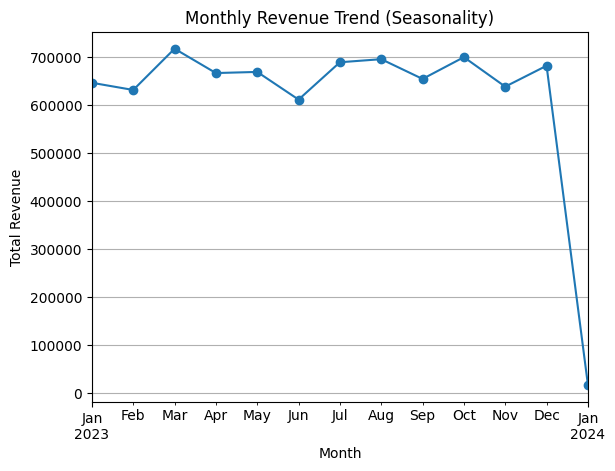

In [25]:
monthly_revenue.plot(kind="line", marker="o")
plt.title("Monthly Revenue Trend (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

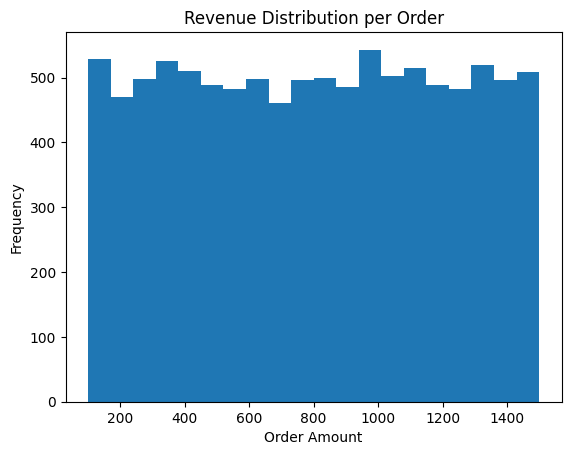

In [26]:
# Revenue Distribution

df["total_amount"].plot(kind="hist", bins=20)
plt.title("Revenue Distribution per Order")
plt.xlabel("Order Amount")
plt.show()

In [27]:
# Which city has the highest total revenue from Gold members?
gold_city_revenue = (
    df[df["membership"] == "Gold"]
    .groupby("city")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

gold_city_revenue


,total_amount
city,
Chennai,1080909.79
Pune,1003012.32
Bangalore,994702.59
Hyderabad,896740.19


In [28]:
# Which cuisine has the highest average order value?

cuisine_avg_order = (
    df.groupby("cuisine")["total_amount"]
    .mean()
    .sort_values(ascending=False)
)

cuisine_avg_order

,total_amount
cuisine,
Mexican,808.021344
Italian,799.448578
Indian,798.466011
Chinese,798.389020


In [29]:
# How many distinct users spent more than ₹1000 in total?

user_total_spend = (
    df.groupby("user_id")["total_amount"]
    .sum()
)

high_spenders = user_total_spend[user_total_spend > 1000]

len(high_spenders)

2544

In [30]:
# Which restaurant rating range generated the highest revenue?

df["rating_range"] = pd.cut(
    df["rating"],
    bins=[3.0, 3.5, 4.0, 4.5, 5.0],
    labels=["3.0–3.5", "3.6–4.0", "4.1–4.5", "4.6–5.0"]
)

rating_revenue = (
    df.groupby("rating_range", observed=True)["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

rating_revenue

,total_amount
rating_range,
4.6–5.0,2197030.75
4.1–4.5,1960326.26
3.0–3.5,1881754.57
3.6–4.0,1717494.41


In [31]:
# Among Gold members, which city has the highest average order value?

gold_city_avg = (
    df[df["membership"] == "Gold"]
    .groupby("city")["total_amount"]
    .mean()
    .sort_values(ascending=False)
)

gold_city_avg

,total_amount
city,
Chennai,808.459080
Hyderabad,806.421034
Bangalore,793.223756
Pune,781.162243


In [32]:
# Which cuisine has the lowest number of distinct restaurants but still significant revenue?

cuisine_analysis = df.groupby("cuisine").agg(
    restaurant_count=("restaurant_id", "nunique"),
    total_revenue=("total_amount", "sum")
).sort_values("restaurant_count")

cuisine_analysis

,restaurant_count,total_revenue
cuisine,,
Chinese,120,1930504.65
Indian,126,1971412.58
Italian,126,2024203.80
Mexican,128,2085503.09


In [33]:
# What % of total orders were placed by Gold members?

total_orders = len(df)
gold_orders = len(df[df["membership"] == "Gold"])

percentage = round((gold_orders / total_orders) * 100)
percentage

50

In [34]:
# Which restaurant has the highest average order value but < 20 orders?

restaurant_stats = df.groupby("restaurant_name_y").agg(
    total_orders=("order_id", "count"),
    avg_order_value=("total_amount", "mean")
)

filtered = restaurant_stats[restaurant_stats["total_orders"] < 20]
filtered.sort_values("avg_order_value", ascending=False).head()

,total_orders,avg_order_value
restaurant_name_y,,
Restaurant_294,13,1040.222308
Restaurant_262,18,1029.473333
Restaurant_77,12,1029.180833
Restaurant_193,15,1026.306667
Restaurant_7,16,1002.140625


In [35]:
# Which combination contributes the highest revenue?

combo_revenue = (
    df.groupby(["membership", "cuisine"])["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

combo_revenue

membership  cuisine
Regular     Mexican    1072943.30
            Italian    1018424.75
Gold        Mexican    1012559.79
            Italian    1005779.05
Regular     Indian      992100.27
Gold        Indian      979312.31
            Chinese     977713.74
Regular     Chinese     952790.91
Name: total_amount, dtype: float64

In [36]:
# During which quarter is total revenue highest?

df["quarter"] = df["order_date"].dt.to_period("Q")

quarter_revenue = (
    df.groupby("quarter")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

quarter_revenue

,total_amount
quarter,
2023Q3,2037385.10
2023Q4,2018263.66
2023Q1,1993425.14
2023Q2,1945348.72
2024Q1,17201.50


In [37]:
import pandas as pd

# Load final dataset
df = pd.read_csv("final_food_delivery_dataset.csv")

# Fix date format
df["order_date"] = pd.to_datetime(df["order_date"], format="%d-%m-%Y")

# (Optional but recommended) Rename columns for clarity
df = df.rename(columns={
    "restaurant_name_x": "order_restaurant_name",
    "restaurant_name_y": "restaurant_name",
    "membership": "membership_type"
})

In [38]:
gold_orders_count = df[df["membership_type"] == "Gold"].shape[0]
gold_orders_count

4987

In [39]:
hyderabad_revenue = df[df["city"] == "Hyderabad"]["total_amount"].sum()

round(hyderabad_revenue)

1889367

In [40]:
distinct_users = df["user_id"].nunique()
distinct_users

2883

In [41]:
gold_avg_order_value = df[df["membership_type"] == "Gold"]["total_amount"].mean()

round(gold_avg_order_value, 2)

np.float64(797.15)

In [42]:
high_rating_orders = df[df["rating"] >= 4.5].shape[0]
high_rating_orders

3374

In [43]:
gold_city_revenue = (
    df[df["membership_type"] == "Gold"]
    .groupby("city")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

gold_city_revenue

,total_amount
city,
Chennai,1080909.79
Pune,1003012.32
Bangalore,994702.59
Hyderabad,896740.19


In [44]:
top_gold_city = gold_city_revenue.index[0]

orders_in_top_gold_city = df[
    (df["membership_type"] == "Gold") &
    (df["city"] == top_gold_city)
].shape[0]

orders_in_top_gold_city


1337